# Домашняя работа №2

In [1]:
import numpy as np
from scipy.optimize import approx_fprime

import matplotlib.pyplot as plt
import numpy as np
import pylab

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks
from PIL import Image

%matplotlib inline

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов
     x + 1
b) 2 локальных экстремума
     np.sin(np.sin(1/x))
с) 3 локальных экстремума
    np.sin(1/x+1)
d*) область определения функции - 1 точка
y= 5


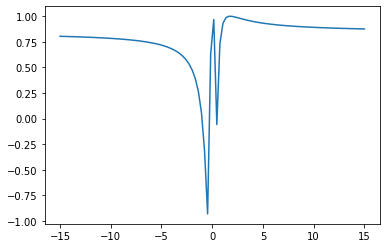

In [67]:
def f(x):
    return np.sin(1/x+1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


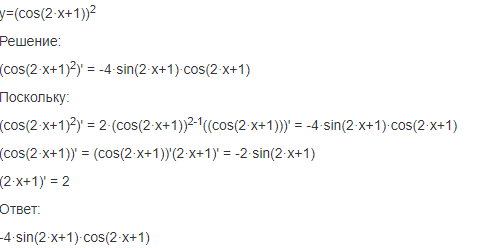

In [2]:
Image.open("stat_hw_2_1.png")

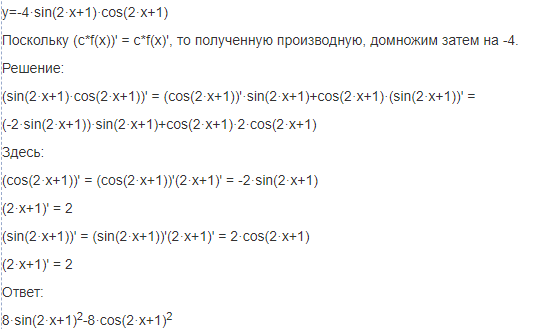

In [3]:

Image.open("stat_hw_2_2.png")

### Задание 3: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

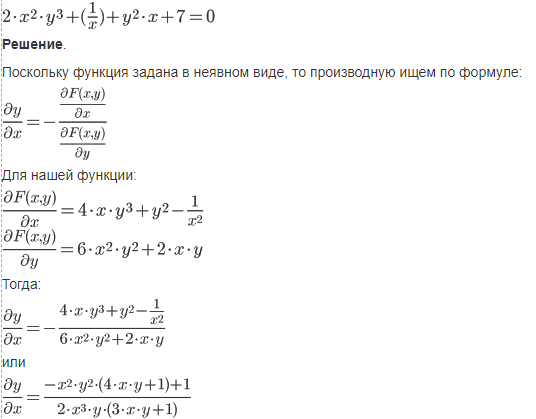

In [4]:
Image.open("stat_hw_2_3.png")

In [118]:
x = 1
y = 2
f = (-1)*(4*x*y**3+y**2-(1/x**2))/(6*x**2*y**2+2*x*y)
# f = (-1*x**2*y**2*(4*x*y+1)+1)/(2*x**3*y*(3*x*y+1))
f

-1.25

In [112]:
from sympy import *

x, y = symbols('x y')

def fun(x, y):
    return 2*x**2*y**3+1/x+y**2*x+7

print(diff(fun(x, y), x))
print(diff(fun(x, y), y))


4*x*y**3 + y**2 - 1/x**2
6*x**2*y**2 + 2*x*y


In [116]:
def func2(x):
    return 2*x[0]**2*x[1]**3+1/x[0]+x[1]**2*x[0]+7
    
# x = np.array[1, 2]
eps = np.sqrt(np.finfo(float).eps)
approx_fprime([1, 2], func2, [eps, eps])

array([35.00000024, 28.00000024])

### Задание 4:

Градиентный спуск своими руками

In [3]:
def f(x):
    return (x[0]**2) + (x[1]**2) 

In [4]:
x = np.array([100, 200])
lr = 0.1

In [6]:
for i in range(100):
    # Calculate gradient
    eps = np.sqrt(np.finfo(float).eps)
    grad = approx_fprime(x, f, [eps, eps])
    # Your code here (функция для вычисления градиента есть в лекционном ноутбуке)
    
    # Update x with gradient
    x =  x - lr * grad
    # Your code here (смотри слайд презентации про градиентный спуск)

In [7]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [1.29197811e-08 3.32901401e-08]
Значение функции в минимуме:  1.2751541739575636e-15


Проверка с помощью встроенной функции scipy: 

In [8]:
res = minimize(f, x, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3


In [9]:
res

 final_simplex: (array([[1.29197811e-08, 3.32901401e-08],
       [1.35657701e-08, 3.32901401e-08],
       [1.29197811e-08, 3.49546472e-08]]), array([1.27515417e-15, 1.29226355e-15, 1.38874810e-15]))
           fun: 1.2751541739575636e-15
       message: 'Optimization terminated successfully.'
          nfev: 3
           nit: 1
        status: 0
       success: True
             x: array([1.29197811e-08, 3.32901401e-08])